In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import math

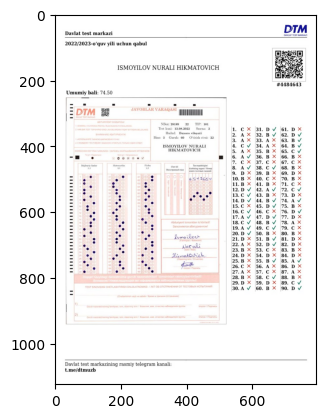

In [2]:
img = cv2.imread("rasmlar/dtm/e6ff538e-3951-416c-8f68-74220c088fba_1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
users = []
l = 1

In [4]:
javob = {
    '1': 'C', '2': 'A', '3': 'A', '4': 'C', '5': 'A', '6': 'A', '7': 'C', '8': 'A', '9': 'D', '10': 'B',
    '11': 'B', '12': 'D', '13': 'C', '14': 'D', '15': 'C', '16': 'C', '17': 'A', '18': 'C', '19': 'A', '20': 'D',
    '21': 'D', '22': 'A', '23': 'B', '24': 'D', '25': 'B', '26': 'C', '27': 'A', '28': 'B', '29': 'D', '30': 'A',
    '31': 'D', '32': 'B', '33': 'A', '34': 'A', '35': 'B', '36': 'B', '37': 'C', '38': 'C', '39': 'B', '40': 'C',
    '41': 'B', '42': 'A', '43': 'B', '44': 'B', '45': 'D', '46': 'C', '47': 'D', '48': 'B', '49': 'C', '50': 'B',
    '51': 'B', '52': 'D', '53': 'C', '54': 'D', '55': 'B', '56': 'A', '57': 'C', '58': 'C', '59': 'D', '60': 'B',
    '61': 'D', '62': 'D', '63': 'B', '64': 'B', '65': 'C', '66': 'B', '67': 'C', '68': 'B', '69': 'D', '70': 'B',
    '71': 'C', '72': 'C', '73': 'D', '74': 'A', '75': 'B', '76': 'D', '77': 'D', '78': 'A', '79': 'C', '80': 'B',
    '81': 'D', '82': 'D', '83': 'B', '84': 'D', '85': 'A', '86': 'D', '87': 'A', '88': 'B', '89': 'C', '90': 'D'
}

In [5]:
h = 490
kalitlar = []
for i in range(84, 261, 88):
    for j in range(489, 789, 10):
        kalitlar.append(img[j:j + 10, i:i + 40])

In [6]:
blok_1 = kalitlar[:30]
blok_2 = kalitlar[30:60]
blok_3 = kalitlar[60:]

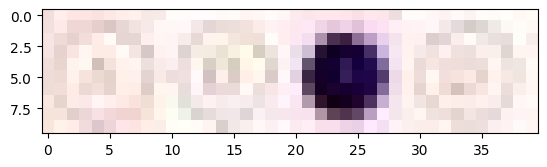

In [7]:
plt.imshow(blok_1[0], cmap="gray")
plt.show()

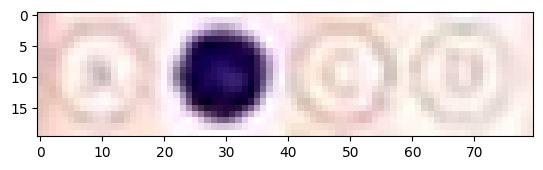

In [8]:
rasm = blok_3[2]
rasm = cv2.resize(rasm, (80, 20), interpolation=cv2.INTER_CUBIC)
plt.imshow(rasm)
plt.show()

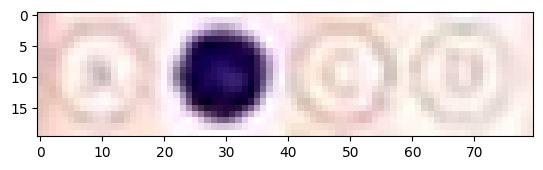

In [9]:
plt.imshow(rasm)
plt.show()

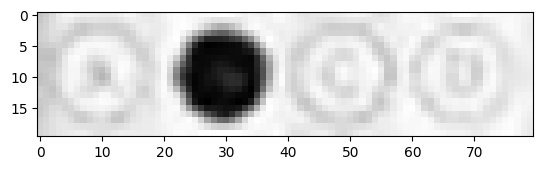

In [10]:
rasm_gray = cv2.cvtColor(rasm, cv2.COLOR_RGB2GRAY)
plt.imshow(rasm_gray, cmap="gray")
plt.show()

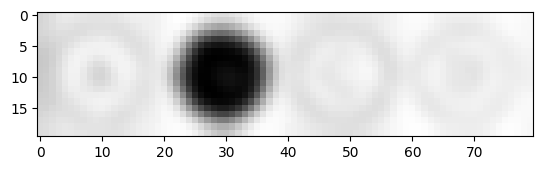

In [11]:
rasm_blur = cv2.GaussianBlur(rasm_gray, (7, 7), cv2.BORDER_CONSTANT)
plt.imshow(rasm_blur, cmap="gray")
plt.show()

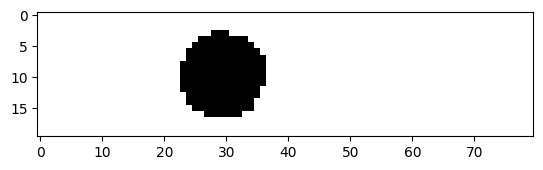

In [12]:
ret, tresh = cv2.threshold(rasm_blur, 127, 255, cv2.THRESH_BINARY)
plt.imshow(tresh, cmap="gray")
plt.show()

In [13]:
abcd = np.hsplit(tresh, 4)

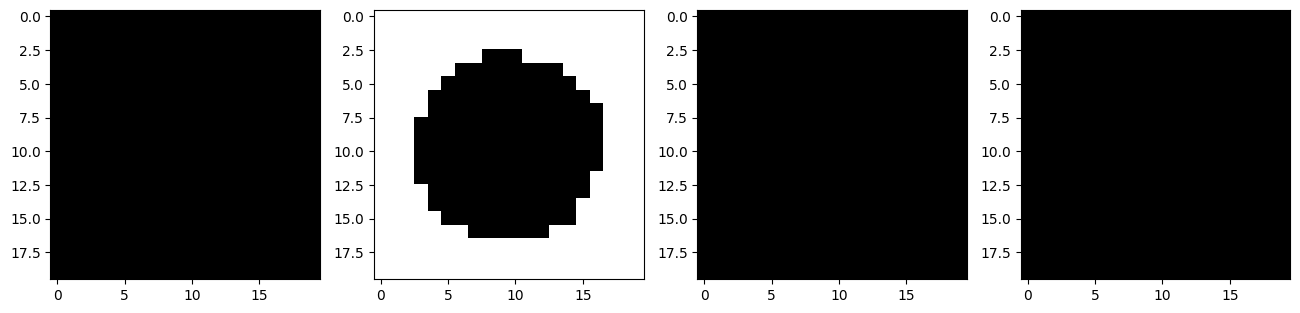

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4), squeeze=True)
x = 0
for i in range(1):
    for j in range(4):
        axes[j].imshow(abcd[x], cmap="gray")
        x += 1
plt.show()

In [15]:
abcd[0].sum()

102000

In [16]:
abcd[1].sum()

62730

In [17]:
abcd[2].sum()

102000

In [18]:
abcd[3].sum()

102000

In [19]:
def summ_kalitlar(mtx):
    javoblar = dict()
    for i in range(30):
        s = []
        rasm = mtx[i]
        rasm = cv2.resize(rasm, (80, 20), interpolation=cv2.INTER_CUBIC)
        rasm_gray = cv2.cvtColor(rasm, cv2.COLOR_RGB2GRAY)
        rasm_blur = cv2.GaussianBlur(rasm_gray, (7, 7), cv2.BORDER_CONSTANT)
        ret, tresh = cv2.threshold(rasm_blur, 127, 255, cv2.THRESH_BINARY)
        abcd = np.hsplit(tresh, 4)
        for j in range(4):
            s.append(abcd[j].sum())
        javoblar[f"{i + 1}"] = s
    return javoblar

In [20]:
hamma_kalitlar = dict()
k = 1
for i in (blok_1, blok_2, blok_3):
    for key, value in summ_kalitlar(i).items():
        hamma_kalitlar[f"{k}"] = value
        k += 1

In [21]:
hamma_kalitlar

{'1': [102000, 102000, 66810, 102000],
 '2': [65025, 102000, 102000, 102000],
 '3': [65280, 102000, 102000, 102000],
 '4': [102000, 102000, 64515, 102000],
 '5': [61200, 102000, 102000, 102000],
 '6': [62730, 102000, 102000, 102000],
 '7': [102000, 102000, 62730, 102000],
 '8': [62985, 102000, 102000, 102000],
 '9': [102000, 102000, 102000, 61965],
 '10': [102000, 62220, 102000, 102000],
 '11': [102000, 61200, 102000, 102000],
 '12': [102000, 102000, 102000, 61710],
 '13': [102000, 102000, 59415, 102000],
 '14': [102000, 102000, 102000, 63240],
 '15': [102000, 102000, 61200, 102000],
 '16': [102000, 102000, 62985, 102000],
 '17': [61455, 102000, 102000, 102000],
 '18': [102000, 102000, 59415, 102000],
 '19': [63240, 102000, 102000, 102000],
 '20': [102000, 102000, 102000, 60435],
 '21': [102000, 102000, 102000, 60945],
 '22': [62985, 102000, 102000, 102000],
 '23': [102000, 60435, 102000, 102000],
 '24': [102000, 102000, 102000, 59415],
 '25': [102000, 63240, 102000, 102000],
 '26': [1

In [22]:
min_summa = []
for k, v in hamma_kalitlar.items():
    v = np.array(v)
    min_summa.append(v.min())
print(min_summa)

[66810, 65025, 65280, 64515, 61200, 62730, 62730, 62985, 61965, 62220, 61200, 61710, 59415, 63240, 61200, 62985, 61455, 59415, 63240, 60435, 60945, 62985, 60435, 59415, 63240, 61455, 61200, 64260, 60435, 60945, 61200, 59670, 57885, 60435, 65790, 64005, 68340, 63240, 65025, 62475, 65535, 63750, 61710, 60435, 57375, 61200, 60435, 63495, 60690, 59160, 60690, 62730, 61710, 60435, 63240, 60945, 62985, 65535, 64005, 63750, 59670, 62475, 62730, 62985, 59670, 64005, 65280, 61710, 61455, 61710, 62730, 64005, 60690, 59925, 59670, 60180, 62475, 61455, 58650, 61455, 58650, 60690, 58905, 63240, 63750, 65280, 63495, 62985, 64770, 65280]


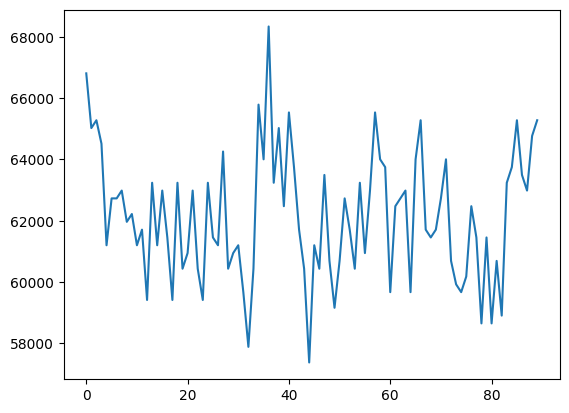

In [23]:
plt.plot(min_summa)
plt.show()

In [24]:
for k, v in hamma_kalitlar.items():
    val = np.array(v)
    if val.min() < 70000:
        if v.index(val.min()) == 0:
            print(k, "A")
        elif v.index(val.min()) == 1:
            print(k, "B")
        elif v.index(val.min()) == 2:
            print(k, "C")
        elif v.index(val.min()) == 3:
            print(k, "D")

1 C
2 A
3 A
4 C
5 A
6 A
7 C
8 A
9 D
10 B
11 B
12 D
13 C
14 D
15 C
16 C
17 A
18 C
19 A
20 D
21 D
22 A
23 B
24 D
25 B
26 C
27 A
28 B
29 D
30 A
31 D
32 B
33 A
34 A
35 B
36 B
37 C
38 C
39 B
40 C
41 B
42 A
43 B
44 B
45 D
46 C
47 D
48 B
49 C
50 B
51 B
52 D
53 C
54 D
55 B
56 A
57 C
58 C
59 D
60 B
61 D
62 D
63 B
64 B
65 C
66 B
67 C
68 B
69 D
70 B
71 C
72 C
73 D
74 A
75 B
76 D
77 D
78 A
79 C
80 B
81 D
82 D
83 B
84 D
85 A
86 D
87 A
88 B
89 C
90 D


In [25]:
talba_kalitlari = dict()
for k, v in hamma_kalitlar.items():
    val = np.array(v)
    if val.min() < 70000:
        if v.index(val.min()) == 0:
            talba_kalitlari[k] = "A"
        elif v.index(val.min()) == 1:
            talba_kalitlari[k] = "B"
        elif v.index(val.min()) == 2:
            talba_kalitlari[k] = "C"
        elif v.index(val.min()) == 3:
            talba_kalitlari[k] = "D"
print(talba_kalitlari)

{'1': 'C', '2': 'A', '3': 'A', '4': 'C', '5': 'A', '6': 'A', '7': 'C', '8': 'A', '9': 'D', '10': 'B', '11': 'B', '12': 'D', '13': 'C', '14': 'D', '15': 'C', '16': 'C', '17': 'A', '18': 'C', '19': 'A', '20': 'D', '21': 'D', '22': 'A', '23': 'B', '24': 'D', '25': 'B', '26': 'C', '27': 'A', '28': 'B', '29': 'D', '30': 'A', '31': 'D', '32': 'B', '33': 'A', '34': 'A', '35': 'B', '36': 'B', '37': 'C', '38': 'C', '39': 'B', '40': 'C', '41': 'B', '42': 'A', '43': 'B', '44': 'B', '45': 'D', '46': 'C', '47': 'D', '48': 'B', '49': 'C', '50': 'B', '51': 'B', '52': 'D', '53': 'C', '54': 'D', '55': 'B', '56': 'A', '57': 'C', '58': 'C', '59': 'D', '60': 'B', '61': 'D', '62': 'D', '63': 'B', '64': 'B', '65': 'C', '66': 'B', '67': 'C', '68': 'B', '69': 'D', '70': 'B', '71': 'C', '72': 'C', '73': 'D', '74': 'A', '75': 'B', '76': 'D', '77': 'D', '78': 'A', '79': 'C', '80': 'B', '81': 'D', '82': 'D', '83': 'B', '84': 'D', '85': 'A', '86': 'D', '87': 'A', '88': 'B', '89': 'C', '90': 'D'}


In [26]:
ball = 0
for key, value in talba_kalitlari.items():
    if int(key) < 31:
        if value == javob[key]:
            ball += 1.1
    elif 30 < int(key) < 61:
        if value == javob[key]:
            ball += 3.1
    else:
        if value == javob[key]:
            ball += 2.1
else:
    print(round(ball))

189


In [27]:
users.append((f"user_{l}", round(ball)))
l += 1

In [28]:
users

[('user_1', 189)]

# Toyyorlash qismi

In [29]:
# Kerakli modullar import qilish
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import math

In [30]:
# natijaga tegishli qator
users = []  # talaba ismi va balini saqlash uchun
l = 1  # talabaning boshlang'ich tartibi

In [31]:
# dtm rasmlari joyshlashgan yo'l
path_dir = "D:\\REST\\pythonProject\\rasmlar\\dtm"
for path in glob.glob(os.path.join(path_dir, "*.jpg")):
    print(path)

D:\REST\pythonProject\rasmlar\dtm\6294a9ec-1631-4508-992f-06e253056be5_1.jpg
D:\REST\pythonProject\rasmlar\dtm\e6ff538e-3951-416c-8f68-74220c088fba_1.jpg


In [32]:
# to'g'ri javoblar
javob = {
    '1': 'C', '2': 'A', '3': 'A', '4': 'C', '5': 'A', '6': 'A', '7': 'C', '8': 'A', '9': 'D', '10': 'B',
    '11': 'B', '12': 'D', '13': 'C', '14': 'D', '15': 'C', '16': 'C', '17': 'A', '18': 'C', '19': 'A', '20': 'D',
    '21': 'D', '22': 'A', '23': 'B', '24': 'D', '25': 'B', '26': 'C', '27': 'A', '28': 'B', '29': 'D', '30': 'A',
    '31': 'D', '32': 'B', '33': 'A', '34': 'A', '35': 'B', '36': 'B', '37': 'C', '38': 'C', '39': 'B', '40': 'C',
    '41': 'B', '42': 'A', '43': 'B', '44': 'B', '45': 'D', '46': 'C', '47': 'D', '48': 'B', '49': 'C', '50': 'B',
    '51': 'B', '52': 'D', '53': 'C', '54': 'D', '55': 'B', '56': 'A', '57': 'C', '58': 'C', '59': 'D', '60': 'B',
    '61': 'D', '62': 'D', '63': 'B', '64': 'B', '65': 'C', '66': 'B', '67': 'C', '68': 'B', '69': 'D', '70': 'B',
    '71': 'C', '72': 'C', '73': 'D', '74': 'A', '75': 'B', '76': 'D', '77': 'D', '78': 'A', '79': 'C', '80': 'B',
    '81': 'D', '82': 'D', '83': 'B', '84': 'D', '85': 'A', '86': 'D', '87': 'A', '88': 'B', '89': 'C', '90': 'D'
}

In [33]:
# rasmlarni tayyorlash
# rasmdan kalitlarni qirqib olibish
def cut_img(pth):
    # rasmni o'qish
    img = cv2.imread(pth)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # kalitlarni qirqib olish
    h = 490;
    kalitlar = []

    for i in range(84, 261, 88):
        for j in range(489, 789, 10):
            kalitlar.append(img[j:j + 10, i:i + 40])

    # bloklarga ajratish
    blok_1 = kalitlar[:30]
    blok_2 = kalitlar[30:60]
    blok_3 = kalitlar[60:]


